In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

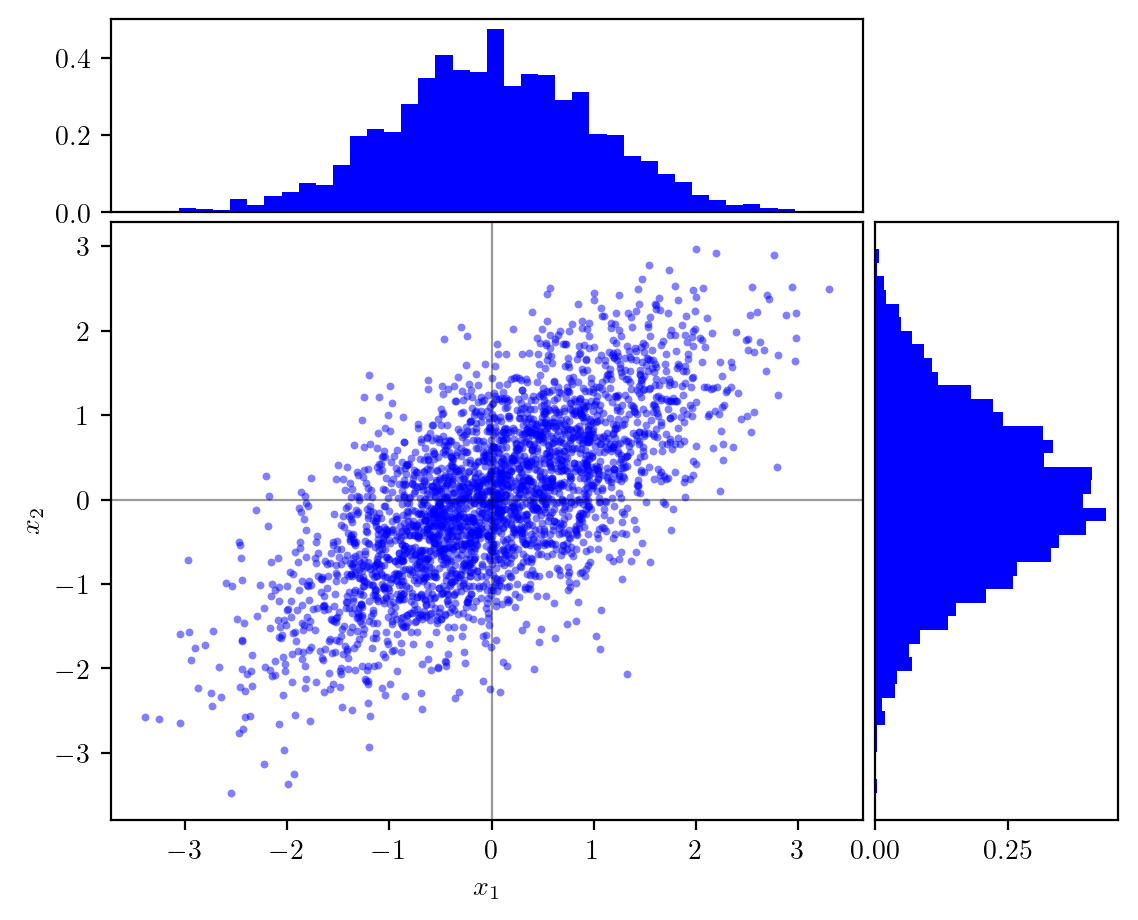

In [ ]:
rng = np.random.default_rng(42)
mu = np.array([0.0, 0.0])
Sigma = np.array([[1.0, 0.7],
                  [0.7, 1.0]])
x = rng.multivariate_normal(mu, Sigma, size=3000)
x1, x2 = x[:, 0], x[:, 1]

fig = plt.figure(figsize=(6.5, 5.2), dpi=200)
gs = fig.add_gridspec(4, 4, hspace=0.05, wspace=0.05)

ax_scatter = fig.add_subplot(gs[1:, :3])
ax_histx  = fig.add_subplot(gs[0,  :3], sharex=ax_scatter)
ax_histy  = fig.add_subplot(gs[1:,  3], sharey=ax_scatter)

# scatter
ax_scatter.scatter(x1, x2, s=8, alpha=0.5, linewidth=0, color="blue")
ax_scatter.set_xlabel(r"$x_1$")
ax_scatter.set_ylabel(r"$x_2$")
ax_scatter.axhline(0, lw=0.8, alpha=0.4, color="black")
ax_scatter.axvline(0, lw=0.8, alpha=0.4, color="black")

# marginal histograms (PDF-like)
bins = 40
ax_histx.hist(x1, bins=bins, density=True, color="blue")
ax_histy.hist(x2, bins=bins, density=True, orientation="horizontal", color="blue")

# tidy ticks
plt.setp(ax_histx.get_xticklabels(), visible=False)
plt.setp(ax_histy.get_yticklabels(), visible=False)
ax_histx.tick_params(axis="x", length=0)
ax_histy.tick_params(axis="y", length=0)

# save
out = "../../../figs/probability/marginalization.pdf"
fig.savefig(out, bbox_inches="tight")
plt.show(fig)